# Gaussian Process Sampling

Use Environment: lgcp

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Gaussian Process Sampling

In [7]:
from math import exp
def rbf_kernel(x1, x2, l = 1):
    return exp(-1 * ((x1-x2) ** 2) / (2*l))
    
def gram_matrix(xs, var, l):
    gram = var * np.array([[rbf_kernel(x1,x2,l) for x2 in xs] for x1 in xs])
    return gram

def sample_from_GP(xs, mean, var, l):
    # Get the gram matrix
    gram = gram_matrix(xs, var, l)
    mean_vec = np.array([mean for x in xs])
    # Sample from the GP
    ys = np.random.multivariate_normal(mean_vec, gram)
    return ys

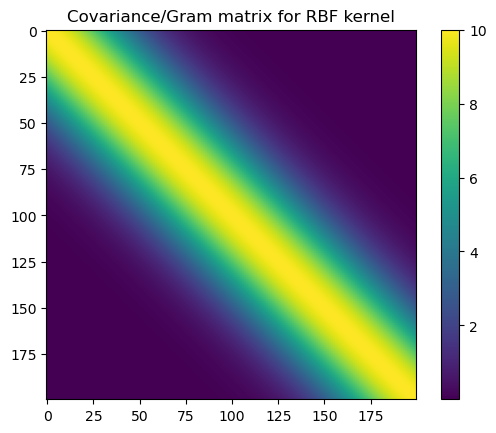

In [11]:
plt.imshow(gram_matrix(np.arange(-1,1,0.01), var=10, l=.1))
plt.title("Covariance/Gram matrix for RBF kernel")
plt.colorbar()

The exponentiated quadratic kernel allows control over the "continuity" of the traffic intensity: the bigger $l$, the smoother the intensity function. The smaller $l$, the more "jagged" the intensity function. The bigger $var$, the intensity could swing in a much bigger range of values. The smaller $var$, the intensity function is more "constrained" in a smaller range of values.

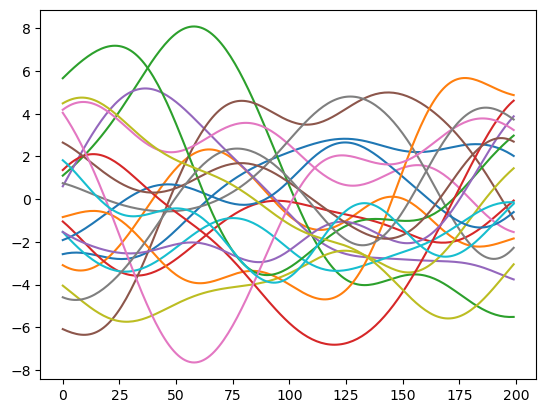

In [12]:
for i in range(20):
    plt.plot(sample_from_GP(np.arange(-1,1,0.01), mean=0, var=10, l=.1))